NUMPY

In [10]:
import numpy as np

a = np.array([1,2,3])
B = np.array([[1,2],[3,4],[5,6]])

print(a.shape, B.shape, B.dtype)

x = np.array([1.0, 2.0, 3.0])
y = x * 2 + 1 

print(y)


# Matrix multiplication
A = np.array([[1,2],[3,4]])
C = A @ np.array([5,6])   # vector product
print("C =", C)

# Means, variances
mean_cols = np.mean(B, axis=0)  # mean per column
std_cols = np.std(B, axis=0)
print(mean_cols, std_cols)


# Random arrays for ML data
rng = np.random.default_rng(42)
X = rng.normal(size=(100, 5))   # 100 samples, 5 features
y = rng.integers(0, 2, size=100) # binary labels

(3,) (3, 2) int64
[3. 5. 7.]
C = [17 39]
[3. 4.] [1.63299316 1.63299316]


PANDAS

In [21]:
import pandas as pd

df = pd.DataFrame({
    "gender": ["M","M","F","M","F","M","M"],
    "age": [48,67,53,49,32,34,21],
    "label": ["sick","sick","healthy","sick","healthy","healthy","healthy"]
})

# df_csv = pd.read_csv("D:\\Work\\Security\\5006\\mcp\\ML\\product.csv")

print(df.head())

# Basic exploration
print(df.describe())           # numeric summary
print(df['gender'].value_counts())


# Convert categorical to numeric
df['gender_code'] = df['gender'].map({"M":0, "F":1})
print(df)


# Split features and target
X = df[['gender_code', 'age']].to_numpy()
y = (df['label'] == 'sick').astype(int).to_numpy()

# fill missing values
df['age'] = df['age'].fillna(df['age'].median())

# one-hot encoding
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
print(df)






  gender  age    label
0      M   48     sick
1      M   67     sick
2      F   53  healthy
3      M   49     sick
4      F   32  healthy
             age
count   7.000000
mean   43.428571
std    15.393258
min    21.000000
25%    33.000000
50%    48.000000
75%    51.000000
max    67.000000
gender
M    5
F    2
Name: count, dtype: int64
  gender  age    label  gender_code
0      M   48     sick            0
1      M   67     sick            0
2      F   53  healthy            1
3      M   49     sick            0
4      F   32  healthy            1
5      M   34  healthy            0
6      M   21  healthy            0
   age    label  gender_code  gender_M
0   48     sick            0      True
1   67     sick            0      True
2   53  healthy            1     False
3   49     sick            0      True
4   32  healthy            1     False
5   34  healthy            0      True
6   21  healthy            0      True


SCIKIT-LEARN
– clean and transform data
– train classical ML models
– benchmark different algorithms
– tune hyperparameters
– evaluate model performance

In [23]:
import pandas as pd

df = pd.DataFrame({
    "gender": ["M","M","F","M","F","M","M","F","F","M"],
    "age": [48,67,53,49,32,34,21,60,45,29],
    "label": ["sick","sick","healthy","sick","healthy","healthy","healthy","sick","healthy","healthy"]
})


# Convert gender to numeric
df['gender_code'] = df['gender'].map({"M":0, "F":1})

# Convert label to 0/1
df['label_code'] = (df['label'] == "sick").astype(int)

# Create feature matrix and target vector
X = df[['gender_code', 'age']].to_numpy()
y = df['label_code'].to_numpy()


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion matrix:
 [[2 0]
 [0 1]]


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=0))
    ]
)


param_grid = {
    "clf__n_estimators":[50,100],
    "clf__max_depth":[None,5]
}

grid = GridSearchCV(pipe, param_grid, cv=3)

grid.fit(X_train, y_train)


print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)


Best params: {'clf__max_depth': None, 'clf__n_estimators': 50}
CV best score: 0.7222222222222222


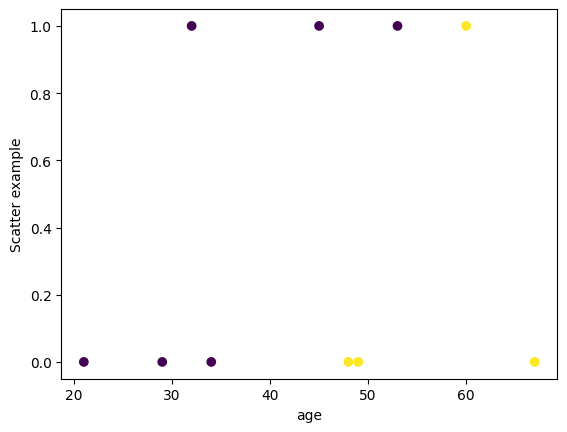

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X[:,1], X[:,0], c=y)
plt.xlabel("age")
plt.ylabel("gender_code")
plt.ylabel("Gender Code")
plt.show()

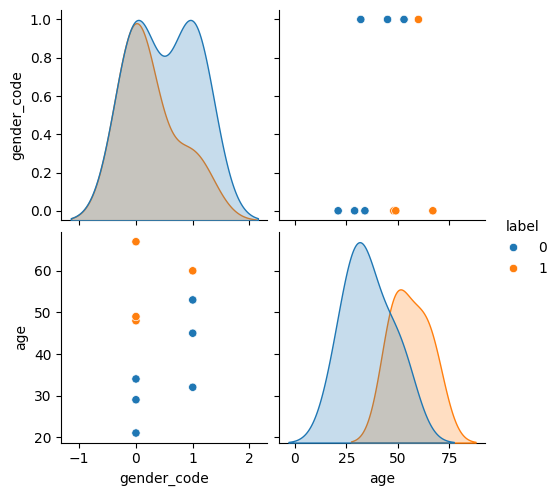

In [31]:
df_small=pd.DataFrame(X, columns=["gender_code","age"])
df_small['label']=y

sns.pairplot(df_small,hue='label')
plt.show()